In [237]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering,KMeans

In [ ]:
# salam aleykum!!!

|Columns | Description|
|--------|------------|
|child_mort | Death of children under 5 years of age per 1000 live births |
|exports |Exports of goods and services per capita. Given as %age of the GDP per capita|
|health |Total health spending per capita. Given as %age of GDP per capita|
|imports | Imports of goods and services per capita. Given as %age of the GDP per capita|
|income |Net income per person|
|inflation |The measurement of the annual growth rate of the Total GDP|
|life_expec |The average number of years a new born child would live if the current mortality patterns are to remain the same|
|total_fer |The number of children that would be born to each woman if the current age-fertility rates remain the same.|
|gdpp |The GDP per capita. Calculated as the Total GDP divided by the total population.|

In [385]:
df=pd.read_csv('Country-data (1).csv')

In [358]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [359]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [286]:
df.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [360]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

<AxesSubplot:>

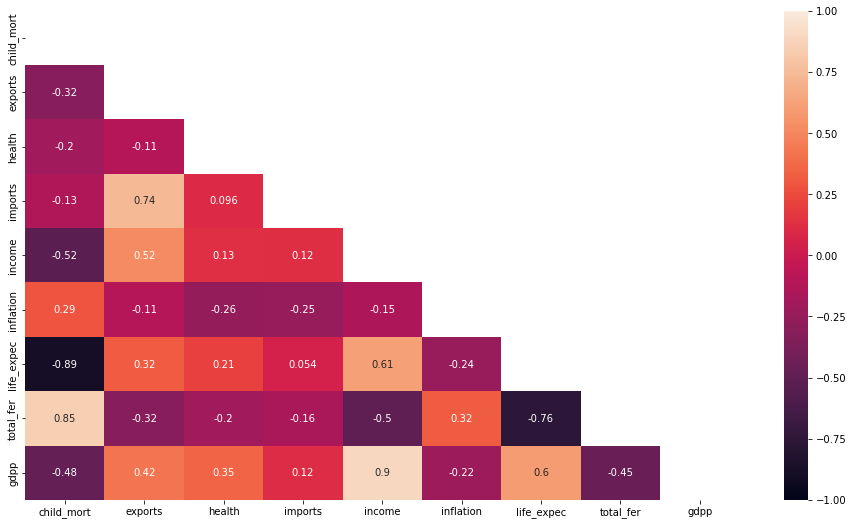

In [149]:
plt.figure(figsize=(16,9))
m=np.triu(np.ones_like(df.corr(),dtype=np.bool8))
sns.heatmap(df.corr(),annot=True,vmax=1,vmin=-1,mask=m)

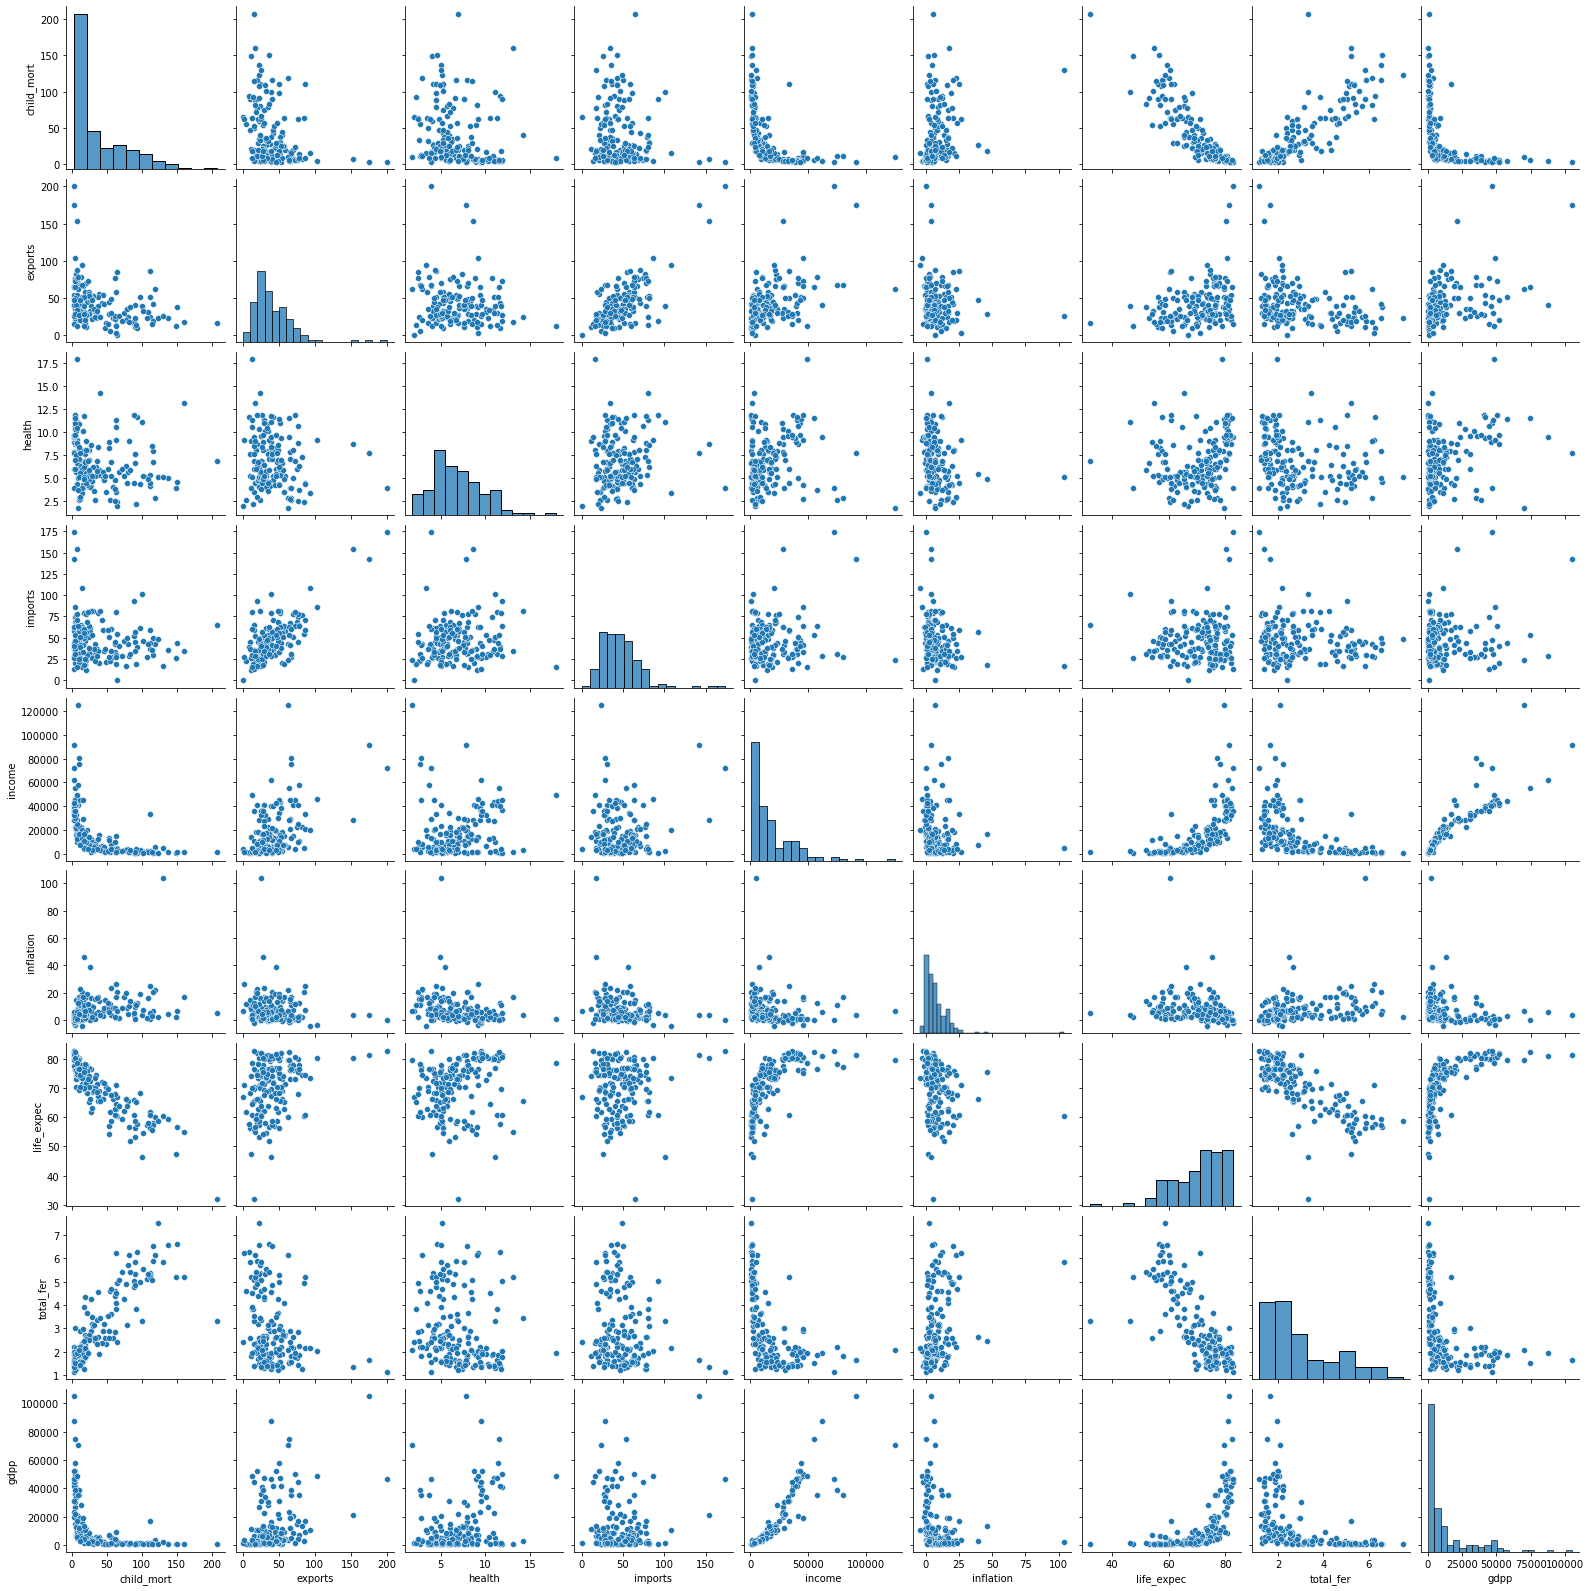

In [87]:
sns.pairplot(df)

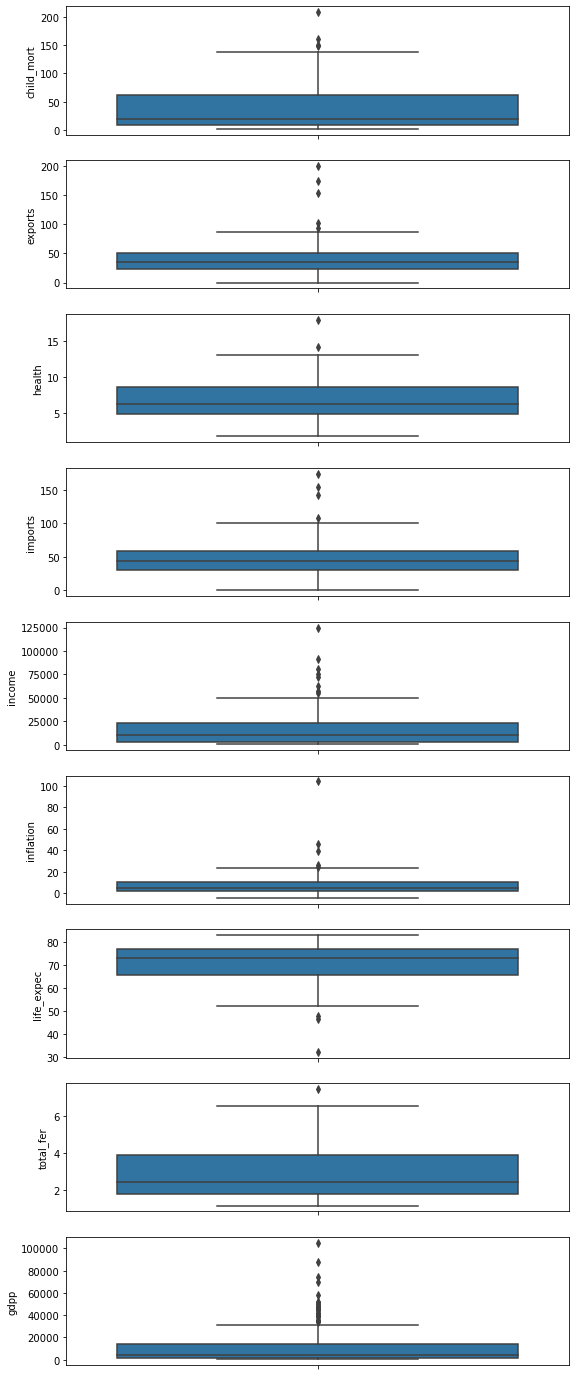

In [361]:
columns=df.columns[1:]
fig,axes=plt.subplots(nrows=len(columns),ncols=1,figsize=(9,25))
for i in range(len(columns)):
    sns.boxplot(ax=axes[i],y=columns[i],data=df)

In [387]:
def outlier_treatment(data):
    q1,q3=data.quantile([.25,.75])
    iqr=q3-q1
    upper=q3+(1.5*iqr)
    lower=q1-(1.5*iqr)
    return lower,upper

In [388]:
for col in df.columns[1:]:
    low,up=outlier_treatment(df[col])
    df[col]=np.clip(df[col],a_min=low,a_max=up)

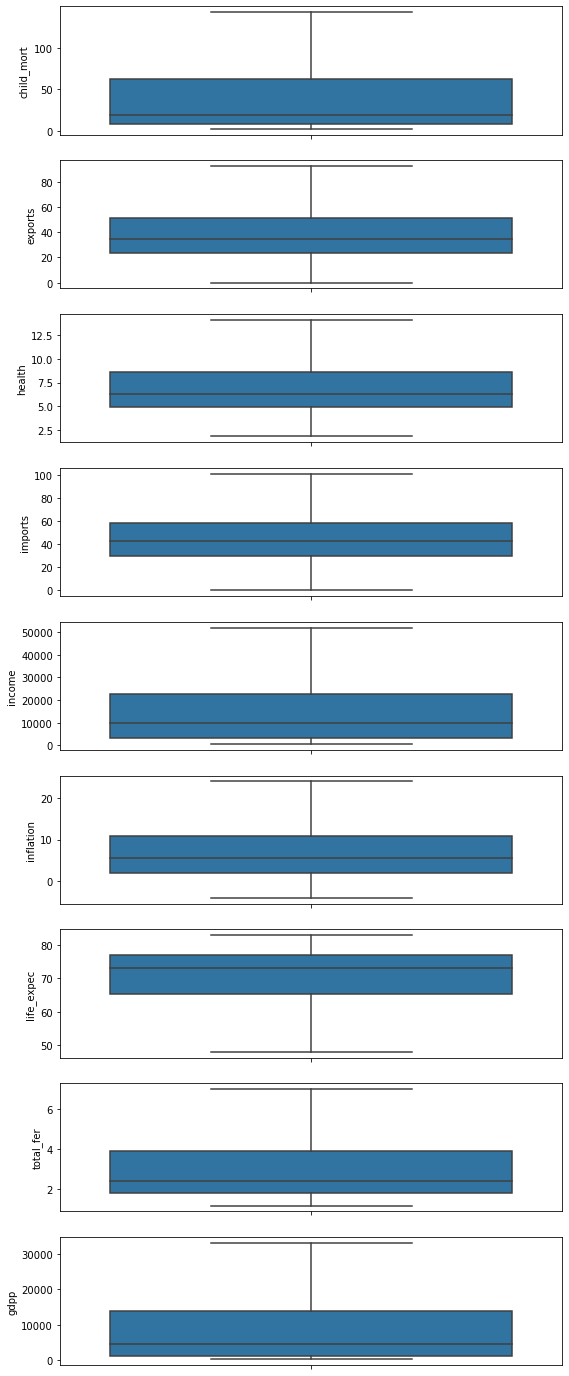

In [389]:
columns=df.columns[1:]
fig,axes=plt.subplots(nrows=len(columns),ncols=1,figsize=(9,25))
for i in range(len(columns)):
    sns.boxplot(ax=axes[i],y=columns[i],data=df)

In [390]:
from sklearn.preprocessing import StandardScaler
X=df.iloc[:,1:]
cols=df.columns[1:]
index=df['country']
scaler= StandardScaler()
X=scaler.fit_transform(X)
scale_df=pd.DataFrame(X,columns=cols,index=index)
scale_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,1.369802,-1.391107,0.296013,-0.047444,-0.943936,0.355270,-1.702225,1.915276,-0.846341
Albania,-0.550464,-0.543547,-0.091190,0.135021,-0.395181,-0.385208,0.663321,-0.862779,-0.540827
Algeria,-0.271295,-0.053846,-0.985893,-0.713196,-0.199291,1.351551,0.686859,-0.036691,-0.508868
Angola,2.121210,1.071524,-1.482114,-0.146074,-0.660984,2.293979,-1.243238,2.141784,-0.589198
Antigua and Barbuda,-0.714835,0.280469,-0.286671,0.642965,0.209637,-0.841463,0.722166,-0.543003,0.159686


# PCA

In [366]:
pca=PCA()
pca.fit(scale_df)

PCA()

<BarContainer object of 9 artists>

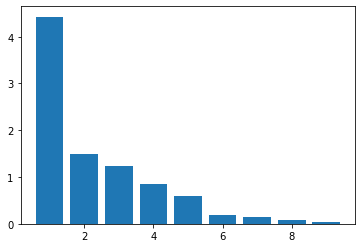

In [367]:
plt.bar(height=pca.explained_variance_,x=range(1,len(pca.explained_variance_)+1))

In [391]:
pca=PCA(n_components=5)
scale_df_pca=pd.DataFrame(pca.fit_transform(scale_df),index=index)
scale_df_pca.head()

,0,1,2,3,4
country,,,,,
Afghanistan,-3.177917,-0.251292,-1.011474,0.778804,-0.014102
Albania,0.434979,-0.218700,-0.292591,-1.391241,0.156711
Algeria,-0.416784,-0.613870,1.637859,-0.615021,0.536604
Angola,-3.306409,1.066649,2.151219,1.698677,0.160551
Antigua and Barbuda,1.253246,0.547778,-0.136955,-0.716890,-0.394628


In [261]:
scale_df_pca=scale_df

# With K-means

In [392]:
k_means=KMeans(n_clusters=3,random_state=123)
k_means_pred=k_means.fit_predict(scale_df_pca)
k_means_pred

array([2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 0,
       0, 1, 1, 1, 1, 2, 2, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1,
       2, 0, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 0, 2, 1, 1,
       2, 0, 0, 0, 1, 2, 0, 0, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2], dtype=int32)

In [393]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970.0
163,Venezuela,17.1,28.5,4.91,17.6,16500.0,24.16,75.4,2.47,13500.0
164,Vietnam,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310.0
165,Yemen,56.3,30.0,5.18,34.4,4480.0,23.60,67.5,4.67,1310.0


In [394]:
df['K_Means_Clusters']=k_means_pred

In [397]:
df[df['country']=='Armenia']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_Means_Clusters
6,Armenia,18.1,20.8,4.4,45.3,6700.0,7.77,73.3,1.69,3220.0,Developing


In [372]:
df['K_Means_Clusters'].value_counts()

1    79
2    47
0    41
Name: K_Means_Clusters, dtype: int64

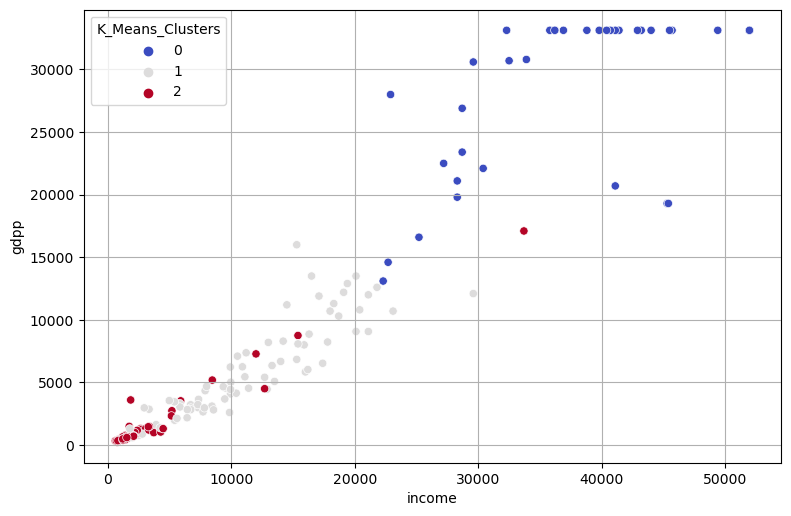

In [373]:
plt.figure(figsize=(9,6),dpi=100)
sns.scatterplot(data=df,x='income',y='gdpp',hue='K_Means_Clusters',palette="coolwarm")
plt.grid()

In [395]:
df['K_Means_Clusters'].replace({0:'Developed',1:'Developing',2:'Underdeveloped'},inplace=True)

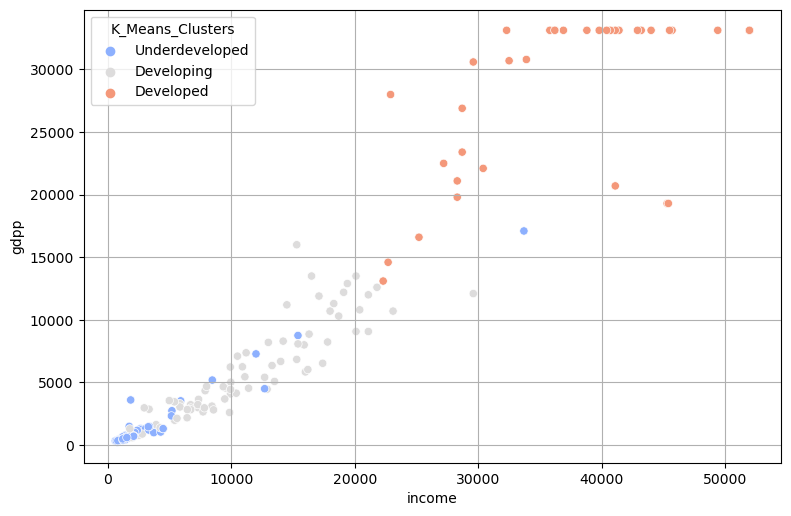

In [375]:
plt.figure(figsize=(9,6),dpi=100)
sns.scatterplot(data=df,x='income',y='gdpp',hue='K_Means_Clusters',palette="coolwarm")
plt.grid()

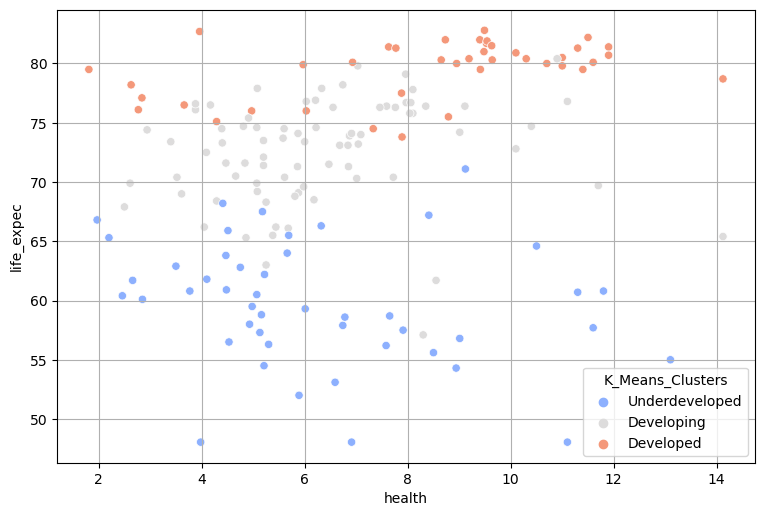

In [330]:
plt.figure(figsize=(9,6),dpi=100)
sns.scatterplot(data=df,x='health',y='life_expec',hue='K_Means_Clusters',palette="coolwarm")
plt.grid()

# Hierarchical Clustering

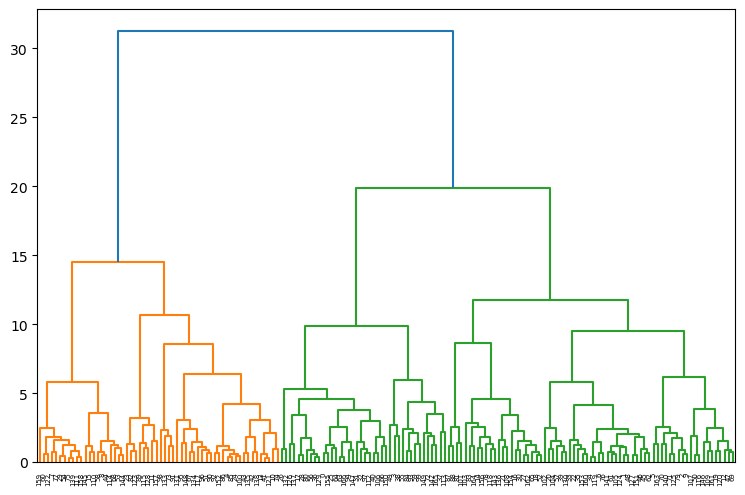

In [377]:
from scipy.cluster.hierarchy import linkage, dendrogram
plt.figure(figsize=(9,6),dpi=100)
dendrogram(linkage(scale_df_pca,method='ward',metric='euclidean'))
plt.show()

In [348]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
hc_pred=hc.fit_predict(scale_df_pca)
hc_pred

array([2, 1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 0, 0, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 0, 0, 0,
       0, 1, 1, 1, 1, 2, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1,
       2, 0, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       0, 0, 2, 2, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 2, 1, 0, 2, 1, 0,
       2, 0, 0, 0, 1, 2, 0, 0, 1, 1, 2, 1, 0, 0, 1, 2, 0, 2, 2, 1, 0, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2])

In [378]:
df['HC_Clusters']=hc_pred

In [379]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_Means_Clusters,HC_Clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,Underdeveloped,2
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,Developing,1
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,Developing,1
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,Underdeveloped,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,Developing,0


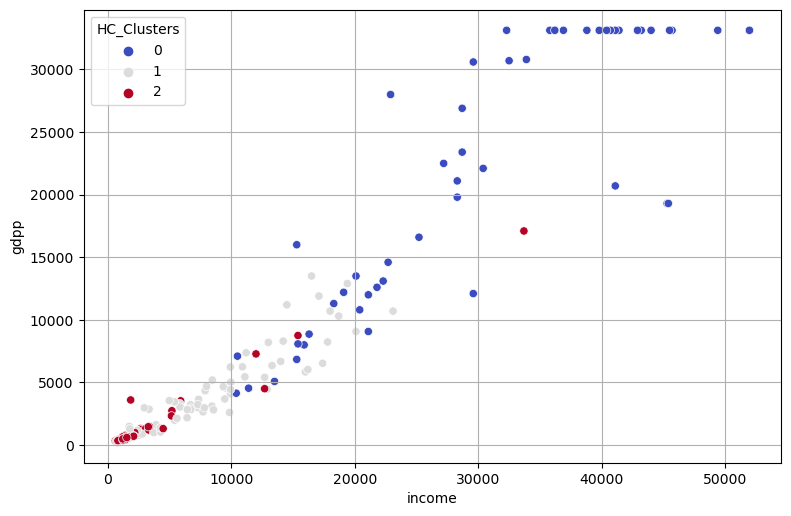

In [380]:
plt.figure(figsize=(9,6),dpi=100)
sns.scatterplot(data=df,x='income',y='gdpp',hue='HC_Clusters',palette="coolwarm")
plt.grid()

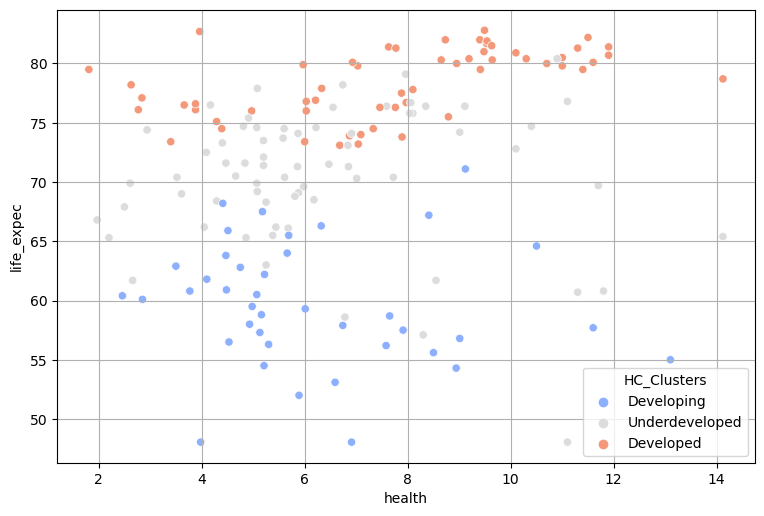

In [384]:
plt.figure(figsize=(9,6),dpi=100)
sns.scatterplot(data=df,x='health',y='life_expec',hue='HC_Clusters',palette="coolwarm")
plt.grid()

In [382]:
df['HC_Clusters'].replace({0:'Developed',2:'Developing',1:'Underdeveloped'},inplace=True)

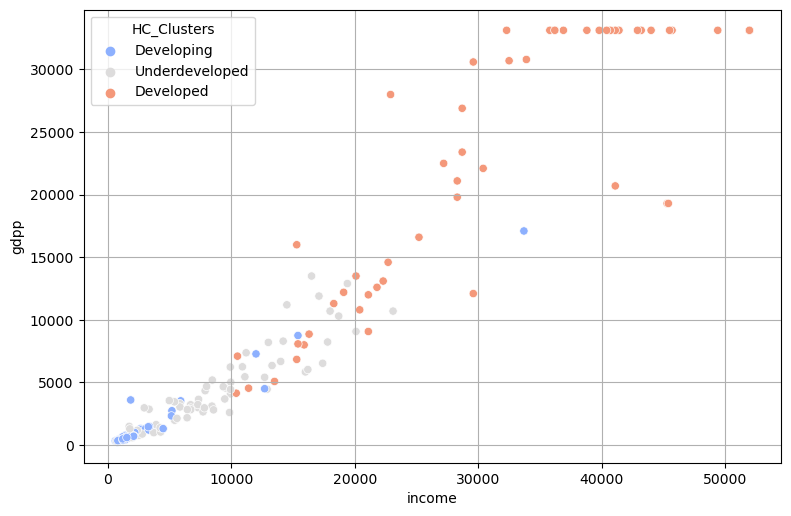

In [383]:
plt.figure(figsize=(9,6),dpi=100)
sns.scatterplot(data=df,x='income',y='gdpp',hue='HC_Clusters',palette="coolwarm")
plt.grid()